# Machine Learning Project - Tyres' Failure Prediction

## Data set description

|Attribute | Type | Notes
| :---        |    :----:   |          ---: |
|vulc | Numerical | Vulcanization level|
|perc nat rubber | Numerical | % natural rubber|
|weather | Numerical | Weather condition index: 1: best, 0: worst|
|perc imp | Numerical | % impurities|
|temperature | Numerical | Temperature in °C|
|elevation | Numerical | Elevation in meters above sea level|
|perc exp comp | Numerical | % experimental compound|
|diameter | Numerical | Diameter in cm|
|tread type | Categorical| 
|tyre season | Categorical | 0: winter tyre, 1: summer tyre|
|month | Categorical | Month of testing|
|tread depth | Categorical| 
|wiring strength | Categorical|
|tyre quality | Categorical | 0: standard, 1: premium|
|add layers | Categorical | Number of additional inner layers|

In [111]:
# Importing libraries required for preliminary analyses and importing dataset

import pandas as pd
import numpy as np

df =  pd.read_csv("../data/train/tyres_model.csv")


In [13]:
# Data Snooping
print(df.head())
print(df.shape)
print(df.describe()) #Also used to see whether in categorical variables some outliers exist or not

     vulc  perc_nat_rubber  wiring_strength  weather  perc_imp  temperature  \
0  17.990               26                1     0.16      0.01        -8.12   
1  20.704               36                1     0.30      0.01        -4.52   
2  19.156               34                1     0.30      0.01        -1.08   
3  16.802               35                1     0.19      0.02         7.44   
4  17.140               23                2     0.39      0.01        30.52   

   tread_type  tyre_season  elevation  month  tread_depth  tyre_quality  \
0           0            1      332.5      8            0             1   
1           2            0      328.0     11            1             0   
2           0            0      247.0      0            1             0   
3           1            0      408.0      7            3             1   
4           0            1      308.0      2            2             0   

   perc_exp_comp  diameter  add_layers  failure  
0           5.13      55

In [3]:
# Checking for duplicates
df[df.duplicated()]

# NO duplicated data are present

,vulc,perc_nat_rubber,wiring_strength,weather,perc_imp,temperature,tread_type,tyre_season,elevation,month,tread_depth,tyre_quality,perc_exp_comp,diameter,add_layers,failure


In [9]:
# Checking for missing values
print(df.isna().any())

# Only diameter has nan values...How many?
df[df.isna().any(axis=1)] 

# 2110 missing entries for "diameter"
# What to do? Is Diameter important or not? --> Check with the theory first, indeed 890 would be already enough to train a model


vulc               False
perc_nat_rubber    False
wiring_strength    False
weather            False
perc_imp           False
temperature        False
tread_type         False
tyre_season        False
elevation          False
month              False
tread_depth        False
tyre_quality       False
perc_exp_comp      False
diameter            True
add_layers         False
failure            False
dtype: bool


,vulc,perc_nat_rubber,wiring_strength,weather,perc_imp,temperature,tread_type,tyre_season,elevation,month,tread_depth,tyre_quality,perc_exp_comp,diameter,add_layers,failure
1,20.704,36,1,0.30,0.01,-4.52,2,0,328.0,11,1,0,6.15,NaN,1,0
2,19.156,34,1,0.30,0.01,-1.08,0,0,247.0,0,1,0,6.36,NaN,1,0
5,20.042,38,0,0.04,0.01,-0.20,2,1,160.5,0,0,0,5.96,NaN,1,0
6,21.172,33,1,0.39,0.01,-2.28,0,0,470.0,3,0,0,6.47,NaN,1,0
7,16.706,32,0,0.62,0.05,-3.96,3,1,148.5,7,2,0,5.39,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,17.860,21,1,0.16,0.01,-6.48,0,1,336.5,8,0,1,5.85,NaN,1,0
2994,19.298,29,1,0.03,0.00,-1.00,2,1,167.5,8,0,0,5.82,NaN,2,0
2995,17.818,29,2,0.39,0.01,7.28,1,1,287.5,10,1,1,5.68,NaN,1,1
2996,17.076,30,1,0.22,0.00,-1.44,1,1,152.5,6,1,0,5.81,NaN,1,1


In [35]:
# Outliers Detection (only numerical variables, "Trial"): Trying with isolation forest

df_numeric = pd.DataFrame()
df_numeric.drop('diameter', inplace=True, axis=1) # Since too mnay NAs (will be analyzed a part)
for i in df.columns.values.tolist():
    if df[i].var() > 1:
        trial = pd.concat([df_numeric, df[i]], axis = 1)


from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples="auto", random_state = 1, contamination= 'auto')
preds = clf.fit_predict(df_numeric)

outliers = pd.DataFrame(preds)
outliers.describe()

# Looks like there are many outlers....do we trust such automatic algorithm?

      0
0     1
1    -1
2     1
3    -1
4    -1
...  ..
2995  1
2996  1
2997  1
2998 -1
2999  1

[3000 rows x 1 columns]


,0
count,3000.000000
mean,0.262667
std,0.965047
min,-1.000000
25%,-1.000000
50%,1.000000
75%,1.000000
max,1.000000


<AxesSubplot:>

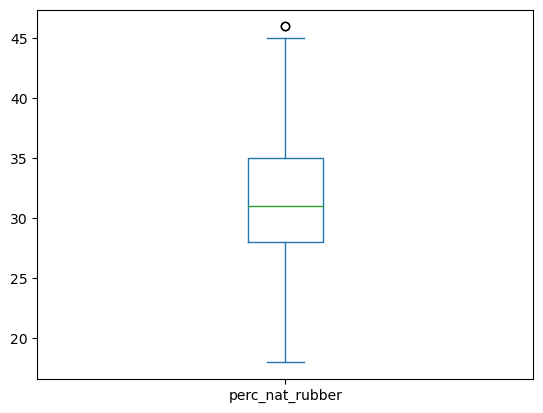

In [64]:
# Outliers' detection only on numeric variables (not categorcal since seen before that no "wrong" values exist)

df_numeric["perc_nat_rubber"].plot.box()

array([[<AxesSubplot:title={'center':'vulc'}>,
        <AxesSubplot:title={'center':'perc_nat_rubber'}>,
        <AxesSubplot:title={'center':'temperature'}>],
       [<AxesSubplot:title={'center':'tread_type'}>,
        <AxesSubplot:title={'center':'elevation'}>,
        <AxesSubplot:title={'center':'month'}>],
       [<AxesSubplot:title={'center':'tread_depth'}>,
        <AxesSubplot:title={'center':'diameter'}>, <AxesSubplot:>]],
      dtype=object)

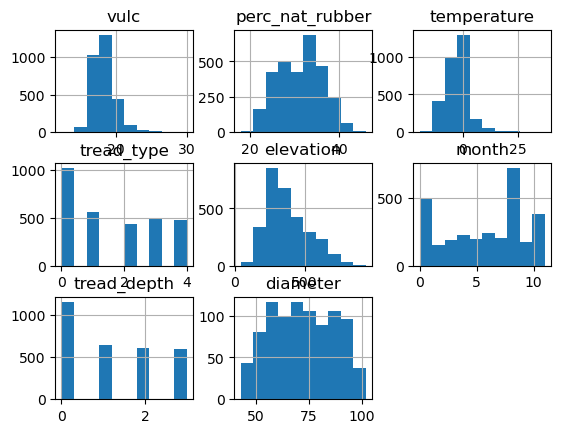

In [52]:
# Checking distribution

df_numeric.hist()

# Question: Does it make sense to treat "tread depth", "tread type" and "month" as numerical? 

# Transforming "vulc" and "temperature" could be sensless. Anyways scaling them migth have sense in order to 
# bring them on similar scales

#Let's check the numeric ones one by one and try to transform them in order to "de-emphasize" outliers' presence

<AxesSubplot:>

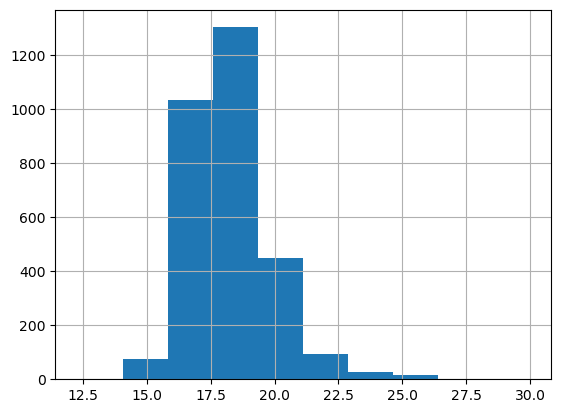

In [59]:
df_numeric["vulc"].hist() #Looks slightly decaying, let's transform it

<AxesSubplot:>

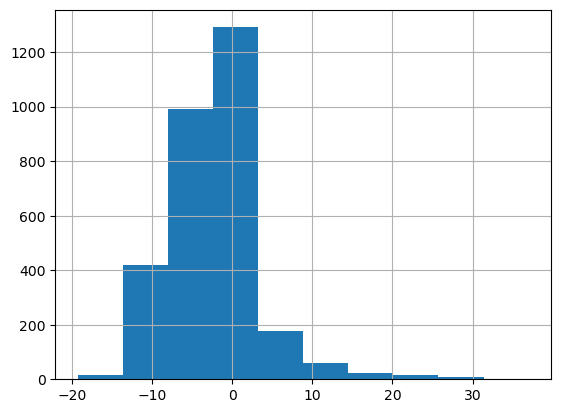

In [60]:
df_numeric["temperature"].hist() #Looks slightly decaying, but does it make sense to transform temperature?....

<AxesSubplot:>

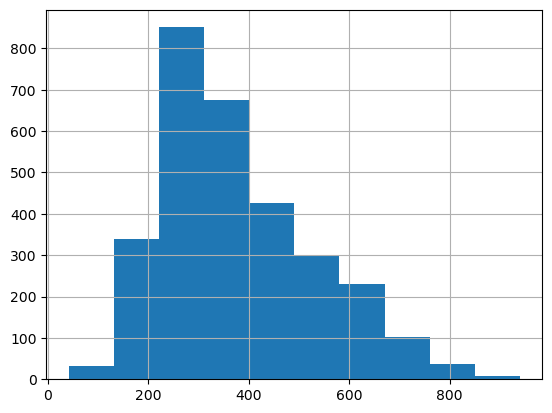

In [61]:
df_numeric["elevation"].hist() #Looks slightly decaying, let's transform it

<AxesSubplot:ylabel='Frequency'>

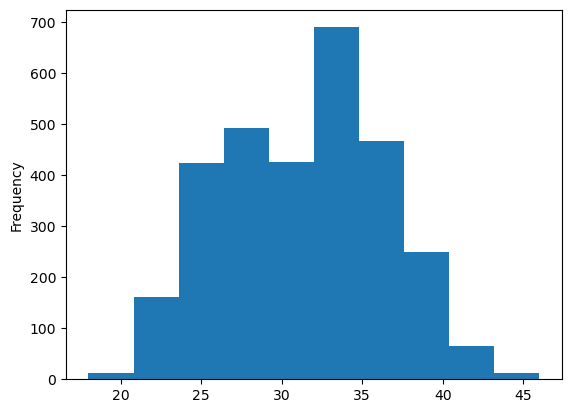

In [70]:
df_numeric["perc_nat_rubber"].plot.hist() # Looks rather "smooth". No need to be transformed

<AxesSubplot:>

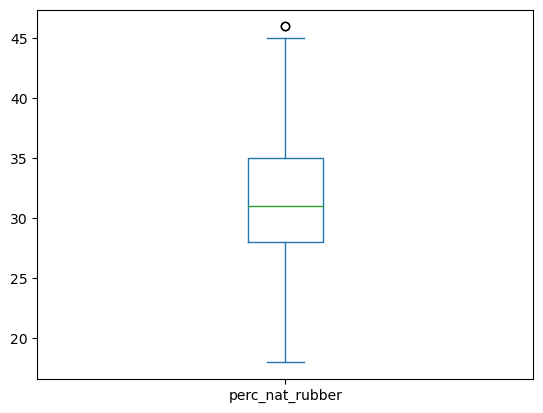

In [71]:
# Looking again at its boxplot in fact
df_numeric["perc_nat_rubber"].plot.box() # It seems one outlier does exist. Does it make sense to remove it before scaling? Not really....

,vulc,perc_nat_rubber,wiring_strength,weather,perc_imp,temperature,tread_type,tyre_season,elevation,month,tread_depth,tyre_quality,perc_exp_comp,diameter,add_layers,failure,log_vulc,log_elevation
0,17.990,26,1,0.16,0.01,-8.12,0,1,332.5,8,0,1,5.13,55.0,1,0,2.943913,5.809643
1,20.704,36,1,0.30,0.01,-4.52,2,0,328.0,11,1,0,6.15,NaN,1,0,3.077497,5.796058
2,19.156,34,1,0.30,0.01,-1.08,0,0,247.0,0,1,0,6.36,NaN,1,0,3.003502,5.513429
3,16.802,35,1,0.19,0.02,7.44,1,0,408.0,7,3,1,6.62,54.5,1,0,2.879311,6.013715
4,17.140,23,2,0.39,0.01,30.52,0,1,308.0,2,2,0,6.15,76.3,1,0,2.898119,5.733341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,17.818,29,2,0.39,0.01,7.28,1,1,287.5,10,1,1,5.68,NaN,1,1,2.934814,5.664695
2996,17.076,30,1,0.22,0.00,-1.44,1,1,152.5,6,1,0,5.81,NaN,1,1,2.894585,5.033701
2997,16.170,33,1,0.39,0.01,-3.44,1,0,235.0,8,3,1,5.57,NaN,0,0,2.843164,5.463832
2998,18.872,37,0,0.03,0.00,-0.76,4,0,290.0,11,0,0,5.89,60.3,0,0,2.989312,5.673323


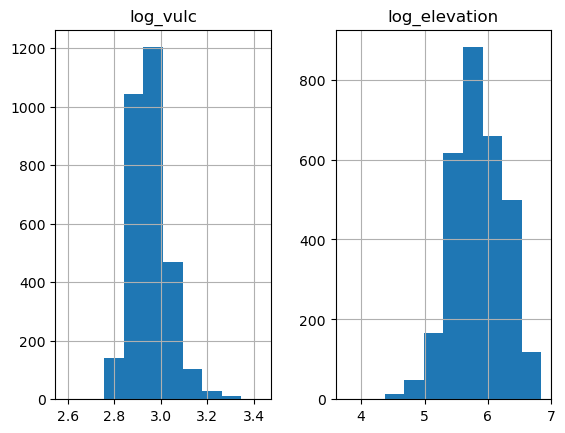

In [105]:
# Transforming data before scaling in order to avoid to mis-scaling them

import math
df["log_vulc"] = df["vulc"].apply(lambda x: math.log(x+1))
df["log_elevation"] = df["elevation"].apply(lambda x: math.log(x+1))

df[["log_vulc", "log_elevation"]].hist()

In [ ]:
# Scaling data.... Not finished yet
from sklearn.preprocessing import MinMaxScaler
mm_scaler =  MinMaxScaler(copy=False,feature_range=(-1, 1))
mm_scaler.fit_transform(df[[""]])

failure
0    1992
1    1008
dtype: int64


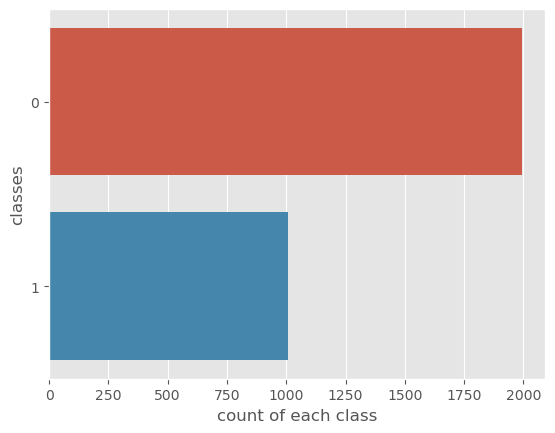

failure
0    585
1    305
dtype: int64


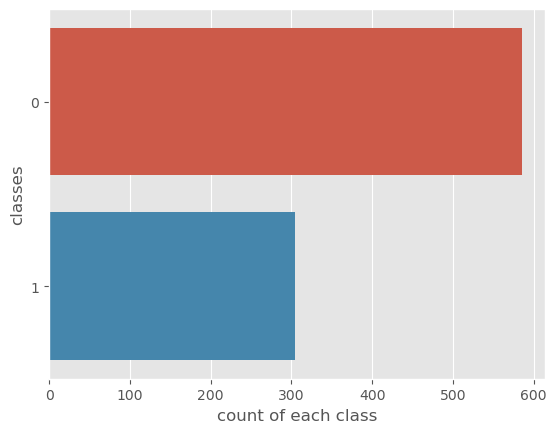

In [112]:
# Is the dataset Balanced or Unbalanced? 

print(df.groupby('failure').size()) #"target" is the name of the target column, change it accordingly to your dataset

plt.style.use('ggplot')

#Visualize Class Counts
sns.countplot(y=df.failure ,data=df) #"target" is the name of the target column, change it accordingly to your dataset
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show()

# What if we would discard all the rows where we do NOT have the diameter? 

df.dropna(inplace=True)
print(df.groupby('failure').size())
sns.countplot(y=df.failure ,data=df) #"target" is the name of the target column, change it accordingly to your dataset
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show()

# Unbalanced dataset with ratio 2:1. Shall we try with over- or under-sampling?


In [19]:
# Dropping Diameter Column...

df_drop =  df.dropna(axis=1)
df_drop.head()
print(df_drop.shape)

(3000, 15)


## Feature selection

This decision will be made according to how the explanatory variables behave with respect to the dependent one. 

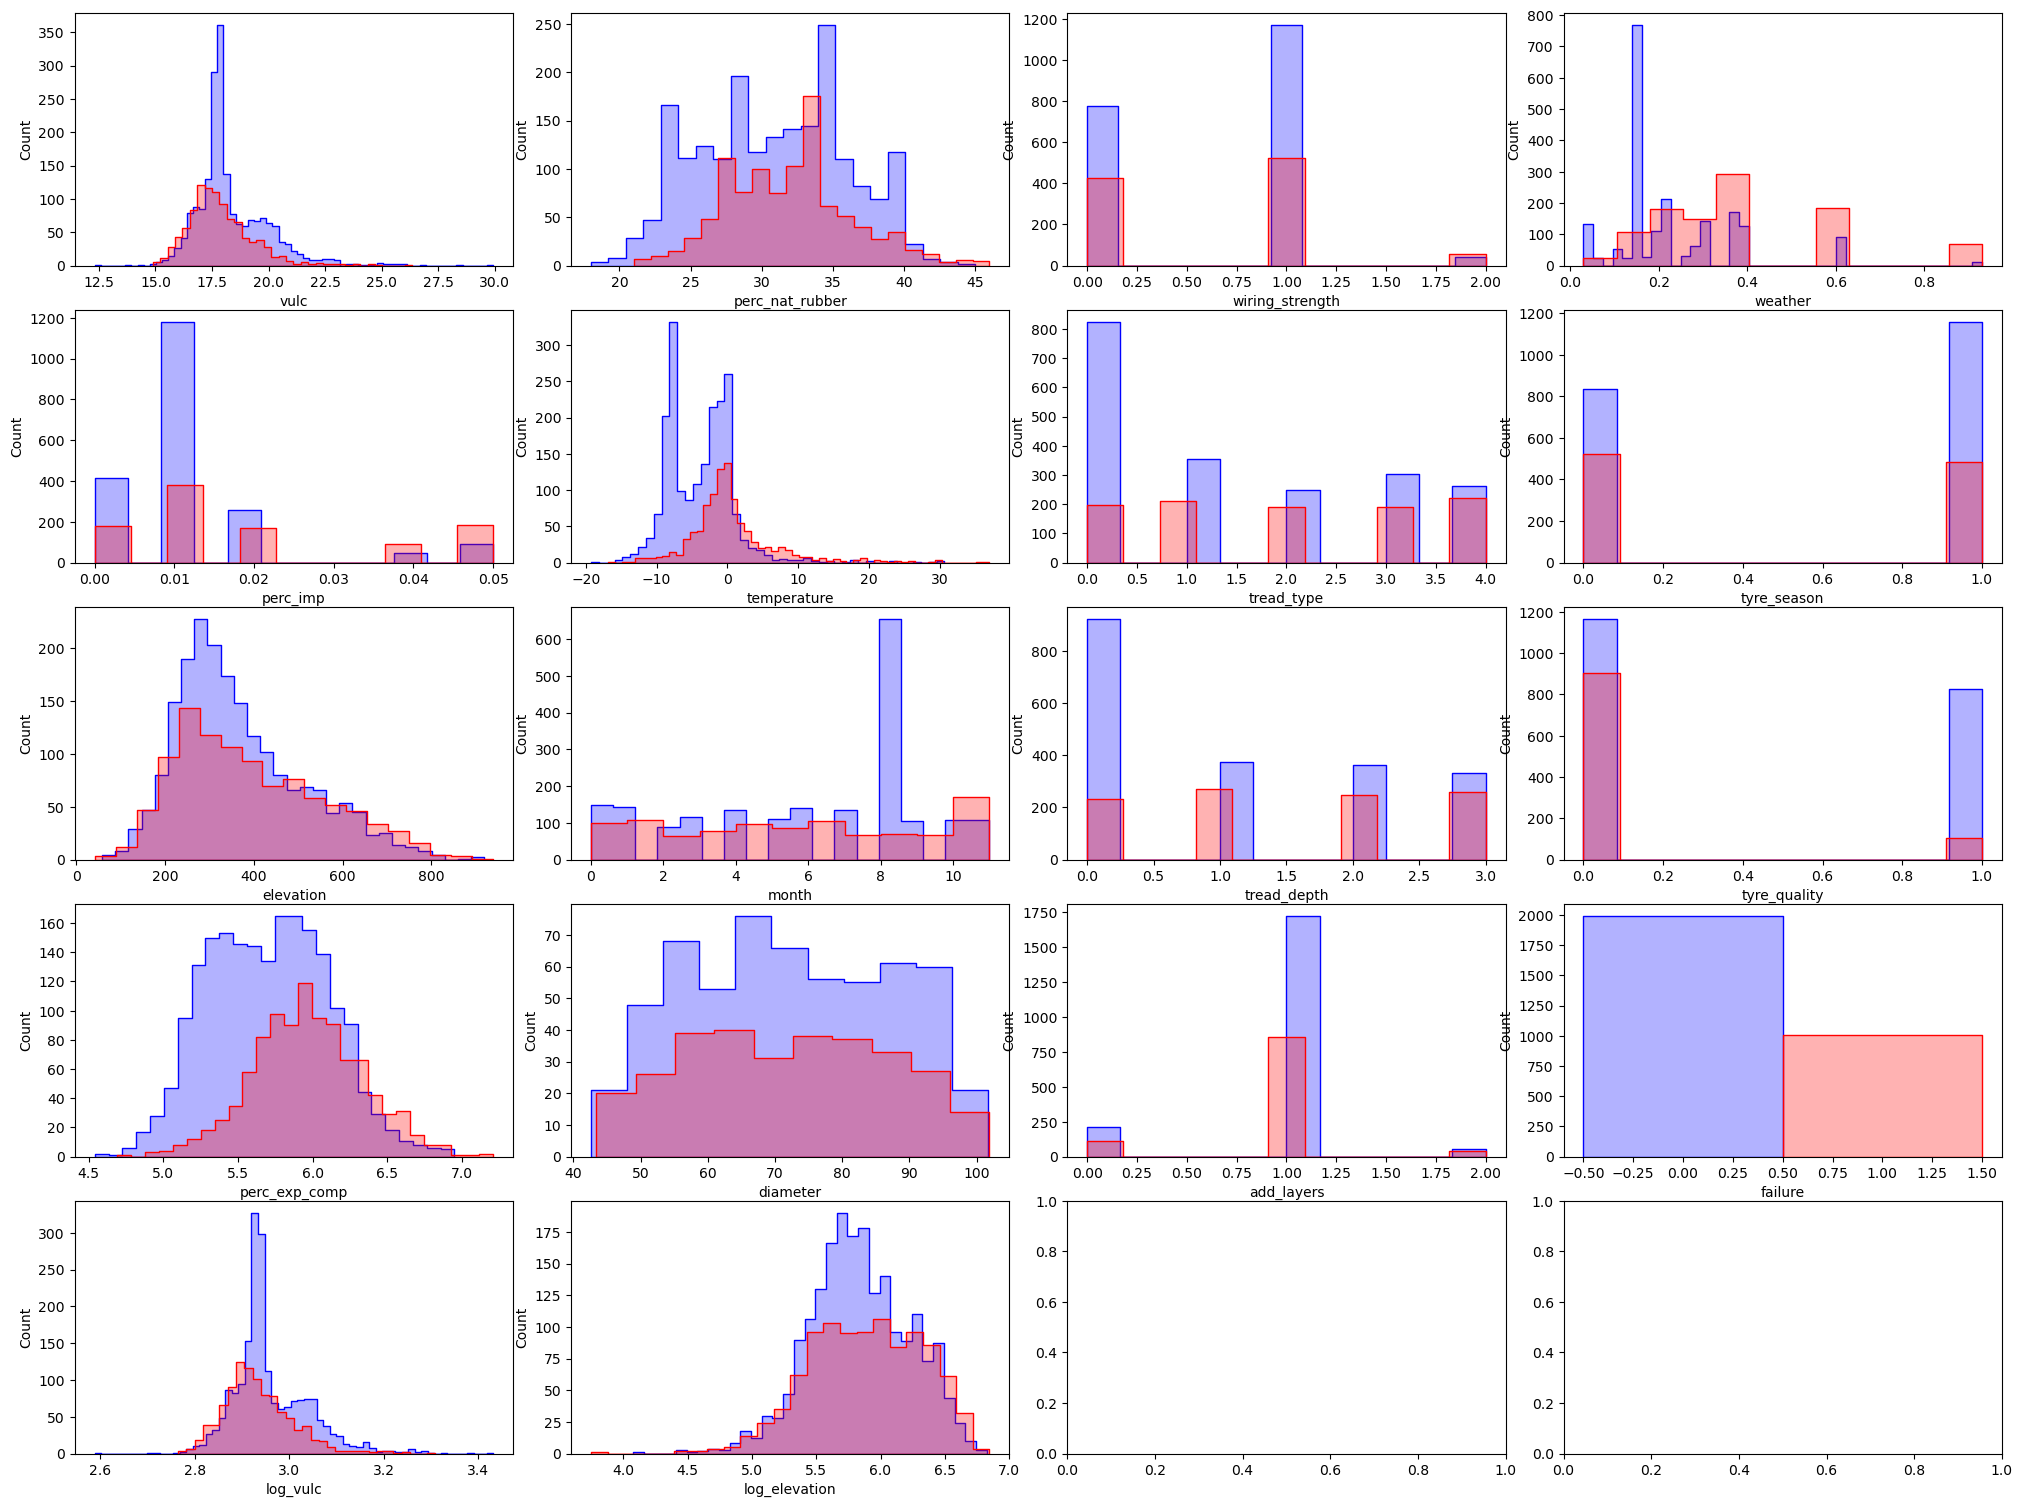

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

X_0 = df[df["failure"] == 0]
X_1 = df[df["failure"] == 1]

fig, axes = plt.subplots(ncols=4, nrows=5, figsize=(20,15))
fig.tight_layout()

for i, ax in zip(range(df.columns.size), axes.flat):
    sns.histplot(X_0.iloc[:,i], color="blue", element="step", ax=ax,  alpha=0.3)#ALpha is a "transparency" variable
    sns.histplot(X_1.iloc[:,i], color="red", element="step", ax=ax,  alpha=0.3)
plt.show()

# Maybe temperature, weather 